In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
import seaborn as sns

file = 'advertising.csv'

dataframe = pd.read_csv(file)
dataframe.head(2)


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4


In [29]:
new_dataframe = dataframe.drop('Newspaper' , axis=1)
new_dataframe

,TV,Radio,Sales
0,230.1,37.8,22.1
1,44.5,39.3,10.4
2,17.2,45.9,12.0
3,151.5,41.3,16.5
4,180.8,10.8,17.9
...,...,...,...
195,38.2,3.7,7.6
196,94.2,4.9,14.0
197,177.0,9.3,14.8
198,283.6,42.0,25.5


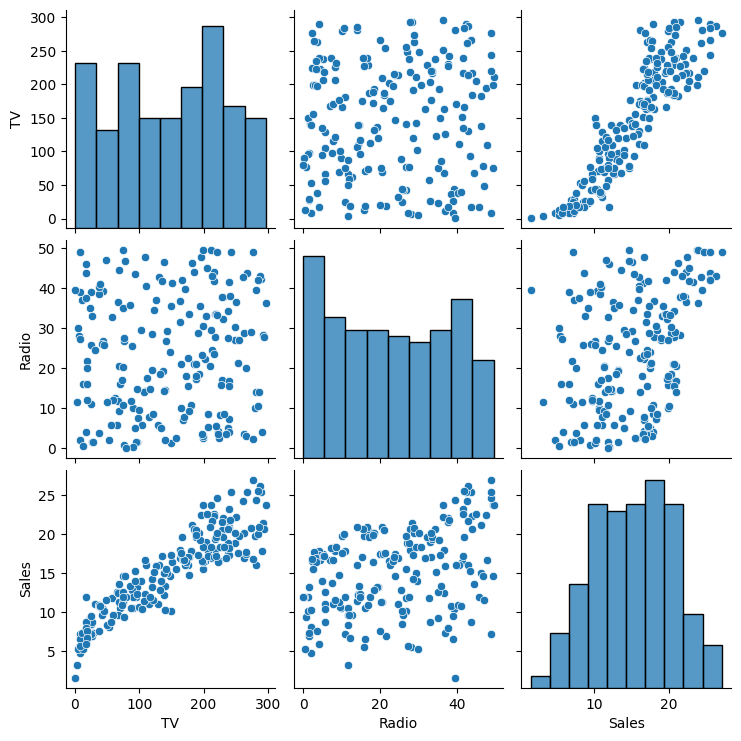

In [30]:
sns.pairplot(new_dataframe)

In [31]:
# min max scaler

scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
scaler.fit_transform(new_dataframe)

array([[0.77578627, 0.76209677, 0.80708661],
       [0.1481231 , 0.79233871, 0.34645669],
       [0.0557998 , 0.92540323, 0.40944882],
       [0.50997633, 0.83266129, 0.58661417],
       [0.60906324, 0.21774194, 0.64173228],
       [0.02705445, 0.9858871 , 0.22047244],
       [0.19208657, 0.66129032, 0.4015748 ],
       [0.4041258 , 0.39516129, 0.45669291],
       [0.02671627, 0.04233871, 0.12598425],
       [0.67331755, 0.05241935, 0.5511811 ],
       [0.2211701 , 0.11693548, 0.43307087],
       [0.72370646, 0.48387097, 0.62204724],
       [0.07811972, 0.70766129, 0.2992126 ],
       [0.32735881, 0.15322581, 0.47637795],
       [0.68785932, 0.66330645, 0.68503937],
       [0.65843761, 0.96169355, 0.81889764],
       [0.22691917, 0.73790323, 0.42913386],
       [0.94927291, 0.7983871 , 0.8976378 ],
       [0.2316537 , 0.41330645, 0.38188976],
       [0.49577274, 0.48185484, 0.51181102],
       [0.73621914, 0.55846774, 0.64566929],
       [0.80047345, 0.10282258, 0.62598425],
       [0.

In [32]:
normalize_dataframe = pd.DataFrame(scaler.fit_transform(new_dataframe),columns=["TV",	"Radio",	"Sales"])
normalize_dataframe

,TV,Radio,Sales
0,0.775786,0.762097,0.807087
1,0.148123,0.792339,0.346457
2,0.055800,0.925403,0.409449
3,0.509976,0.832661,0.586614
4,0.609063,0.217742,0.641732
...,...,...,...
195,0.126818,0.074597,0.236220
196,0.316199,0.098790,0.488189
197,0.596212,0.187500,0.519685
198,0.956713,0.846774,0.940945


In [88]:
epoch = 300
w =np.zeros(2)
X= normalize_dataframe.drop(['Sales'],axis=1)
y = normalize_dataframe[['Sales']]

n_samples = X.shape[0]
n_features = X.shape[1]  # 2 features
b = 0
learn_rate = 0.01

def cost_function(X,y,w,b):
    
    cost = 0
    for i in range(n_samples):
        y_model = np.dot(X.iloc[i],w) + b
        error = y_model - y.iloc[i]
        cost += error**2
    cost = cost / (2* n_samples)
    return cost       
        
def gradient(X,y,w,b):
    dj_dw  = np.zeros(n_features)
    dj_db = 0
    for s in range(n_samples):
        
        error = (np.dot(X.iloc[s] ,w) + b) - y.iloc[s,0]
        
        for f in range(n_features):
            
            dj_dw [f] = dj_dw[f]  + error * X.iloc[s,f]
        dj_db = dj_db + error
    dj_dw = dj_dw / n_samples
    dj_db = dj_db / n_samples
    
    return dj_dw , dj_db


[Sales    0.158862
Name: 0, dtype: float64, Sales    0.154446
Name: 0, dtype: float64, Sales    0.150161
Name: 0, dtype: float64, Sales    0.146003
Name: 0, dtype: float64, Sales    0.141967
Name: 0, dtype: float64, Sales    0.138052
Name: 0, dtype: float64, Sales    0.134252
Name: 0, dtype: float64, Sales    0.130565
Name: 0, dtype: float64, Sales    0.126986
Name: 0, dtype: float64, Sales    0.123514
Name: 0, dtype: float64, Sales    0.120144
Name: 0, dtype: float64, Sales    0.116875
Name: 0, dtype: float64, Sales    0.113701
Name: 0, dtype: float64, Sales    0.110622
Name: 0, dtype: float64, Sales    0.107634
Name: 0, dtype: float64, Sales    0.104734
Name: 0, dtype: float64, Sales    0.10192
Name: 0, dtype: float64, Sales    0.099189
Name: 0, dtype: float64, Sales    0.096539
Name: 0, dtype: float64, Sales    0.093967
Name: 0, dtype: float64, Sales    0.091471
Name: 0, dtype: float64, Sales    0.089049
Name: 0, dtype: float64, Sales    0.086699
Name: 0, dtype: float64, Sales    0.

/home/hadisasadi/myenv/lib/python3.12/site-packages/matplotlib/cbook.py:1719: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.isfinite(val)


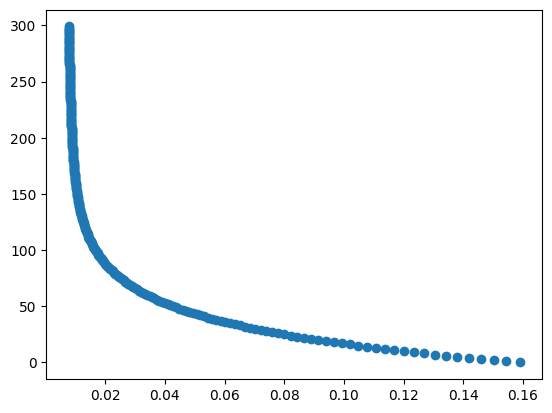

In [89]:
cost_array = []

for i in range(epoch):
    dj_dw,dj_db = gradient(X,y,w,b)
    w = w - learn_rate * dj_dw
    b = b - learn_rate * dj_db
    cost_array.append(cost_function(X,y,w,b))


print(cost_array , w ,b)
plt.scatter(cost_array , range(epoch))

/tmp/ipykernel_5774/2638285197.py:12: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(tv_data, radio_data , sales_data , cmap='viridis')


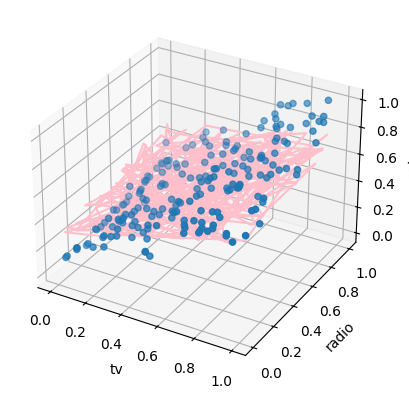

In [110]:
from mpl_toolkits.mplot3d import Axes3D  

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

tv_data = normalize_dataframe[['TV']].values
radio_data = normalize_dataframe[['Radio']].values
sales_data = normalize_dataframe[['Sales']].values

y_predict_3d = w[0]*tv_data + w[1] * radio_data + b

ax.scatter(tv_data, radio_data , sales_data , cmap='viridis')
ax.plot(tv_data,radio_data , y_predict_3d,color ='pink')
ax.set_xlabel('tv')
ax.set_ylabel('radio')
ax.set_zlabel('sales')

plt.show()


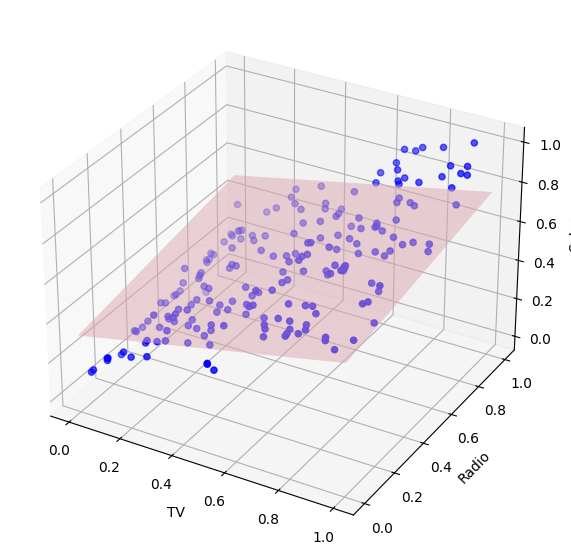

In [ ]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(tv_data, radio_data, sales_data, color='blue', label='Real Data')

tv_range, radio_range = np.meshgrid(
    np.linspace(tv_data.min(), tv_data.max(), 20),
    np.linspace(radio_data.min(), radio_data.max(), 20)
)

y_predict_surface = w[0] * tv_range + w[1] * radio_range + b

ax.plot_surface(tv_range, radio_range, y_predict_surface, alpha=0.5, color='pink')

ax.set_xlabel('TV')
ax.set_ylabel('Radio')
ax.set_zlabel('Sales')

plt.show()


In [112]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X,y)

print(model.coef_)
print(model.intercept_)

[0.27157083 0.        ]
0.3220234911004928


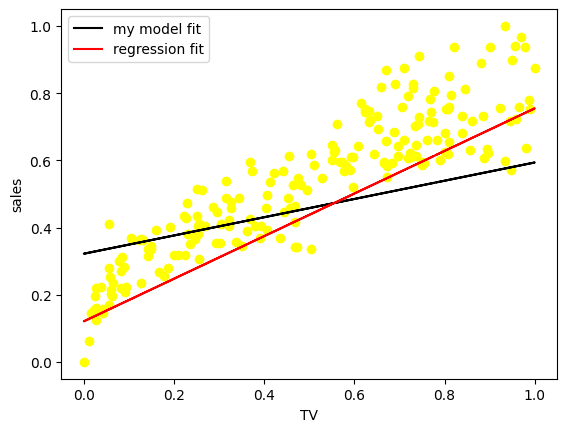

In [106]:
tv_data = normalize_dataframe['TV'].values
sales = normalize_dataframe['Sales'].values

y_predict = w[0] * tv_data + b
y_model_regression = model.coef_[0,0] * tv_data + model.intercept_

plt.scatter(tv_data , sales , color = 'yellow')
plt.plot(tv_data, y_predict , color = 'black' , label = 'my model fit')
plt.plot(tv_data,y_model_regression ,color = 'red' , label = 'regression fit')
plt.xlabel('TV')
plt.ylabel('sales')
plt.legend()
plt.show()